# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Data Pre-processing

 Let us import our dataset using the pandas library and review the first ten rows to get a birds eye view on our data

In [3]:
data = pd.read_csv('Population data.csv')
data.head(10)

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,NaN
1,Annual Population Change,1951,Annual deaths,Thousand,NaN
2,Annual Population Change,1951,Natural increase,Thousand,26.6
3,Annual Population Change,1951,Immigrants,Thousand,NaN
4,Annual Population Change,1951,Emigrants,Thousand,NaN
5,Annual Population Change,1951,Net migration,Thousand,-35.0
6,Annual Population Change,1951,Population change,Thousand,-8.4
7,Annual Population Change,1951,Population,Thousand,2960.6
8,Annual Population Change,1952,Annual births,Thousand,NaN
9,Annual Population Change,1952,Annual deaths,Thousand,NaN


 Our data contains some missing values in the 'VALUE' field so we will check if any other field contains missing values or not

In [4]:
data.isna().sum()

STATISTIC Label      0
Year                 0
Component            0
UNIT                 0
VALUE              144
dtype: int64

Only VALUE field contains missing values. Let us plot VALUE field to see how the values changes over the indexes

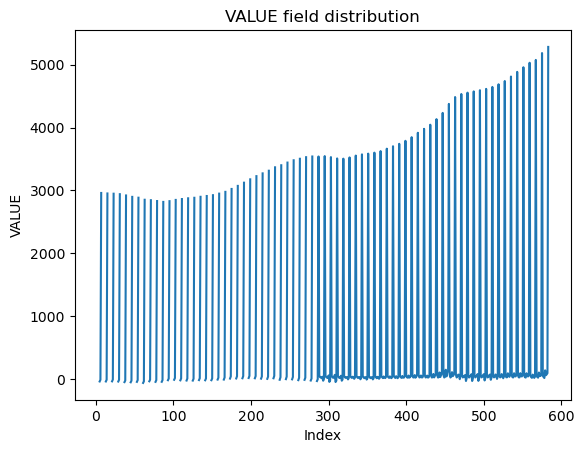

In [5]:
plt.plot(data['VALUE'])
plt.xlabel('Index')
plt.ylabel('VALUE')
plt.title("VALUE field distribution")
plt.show()

It is observed that the initail values shows less dense values then values above the index of 280. This indicates that data is missing for starting years. We check in which years we have missing values and deal with them accordingly

In [6]:
temp = [data[data['Year'] == year]['VALUE'].isna().sum() for year in data['Year'].unique()]    ## Missing value of VALUE in each Year

missing_value_years = {
    'Year': data['Year'].unique(),
    'Missing_VALUE': temp
}

temp = pd.DataFrame(missing_value_years)

temp[temp['Missing_VALUE'] != 0]

,Year,Missing_VALUE
0,1951,4
1,1952,4
2,1953,4
3,1954,4
4,1955,4
5,1956,4
6,1957,4
7,1958,4
8,1959,4
9,1960,4


This table shows that from year 1951 to 1986, VALUES field is missing for 4 Components named Annual births, Annual deaths, Immigrants and Emigrants. We have sufficient data to carry out our analysis therefore we filter data from 1986 to onwards which eliminates all missing values from our dataset

In [7]:
data = data[data['Year'] > 1986]
data.head(10)


,STATISTIC Label,Year,Component,UNIT,VALUE
288,Annual Population Change,1987,Annual births,Thousand,61.2
289,Annual Population Change,1987,Annual deaths,Thousand,32.2
290,Annual Population Change,1987,Natural increase,Thousand,29.0
291,Annual Population Change,1987,Immigrants,Thousand,17.2
292,Annual Population Change,1987,Emigrants,Thousand,40.2
293,Annual Population Change,1987,Net migration,Thousand,-23.0
294,Annual Population Change,1987,Population change,Thousand,5.9
295,Annual Population Change,1987,Population,Thousand,3546.5
296,Annual Population Change,1988,Annual births,Thousand,57.8
297,Annual Population Change,1988,Annual deaths,Thousand,31.6


 Now we will check again any missing values

In [8]:
data.isna().sum()

STATISTIC Label    0
Year               0
Component          0
UNIT               0
VALUE              0
dtype: int64

 Now our data is cleaned and ready for analysis

#### Statistics

 Let us again review our data after cleaning

In [9]:
data.head(10)

,STATISTIC Label,Year,Component,UNIT,VALUE
288,Annual Population Change,1987,Annual births,Thousand,61.2
289,Annual Population Change,1987,Annual deaths,Thousand,32.2
290,Annual Population Change,1987,Natural increase,Thousand,29.0
291,Annual Population Change,1987,Immigrants,Thousand,17.2
292,Annual Population Change,1987,Emigrants,Thousand,40.2
293,Annual Population Change,1987,Net migration,Thousand,-23.0
294,Annual Population Change,1987,Population change,Thousand,5.9
295,Annual Population Change,1987,Population,Thousand,3546.5
296,Annual Population Change,1988,Annual births,Thousand,57.8
297,Annual Population Change,1988,Annual deaths,Thousand,31.6


The Annual Population change is categorized in different Components. Let us review the statistics for each component. It is noted that all the values comes in thousand unit scale as per seen from the dataset

In [10]:
temp = {
    'Component':data['Component'].unique(),
    'Mean': None,
    'Std': None
}

Mean=[]
Std=[]

for Component in temp['Component']:
    Mean.append(data[data['Component'] == Component]['VALUE'].describe()['mean'])
    Std.append(data[data['Component'] == Component]['VALUE'].describe()['std'])

temp['Mean'] = Mean
temp['Std'] = Std

temp = pd.DataFrame(temp)
temp

,Component,Mean,Std
0,Annual births,60.105405,8.080462
1,Annual deaths,30.651351,1.975070
2,Natural increase,29.443243,9.450031
3,Immigrants,65.405405,32.716840
4,Emigrants,48.459459,18.520371
5,Net migration,16.937838,34.750950
6,Population change,46.383784,35.901095
7,Population,4206.608108,575.151783


We will also visualize it graphically using the normal distribution

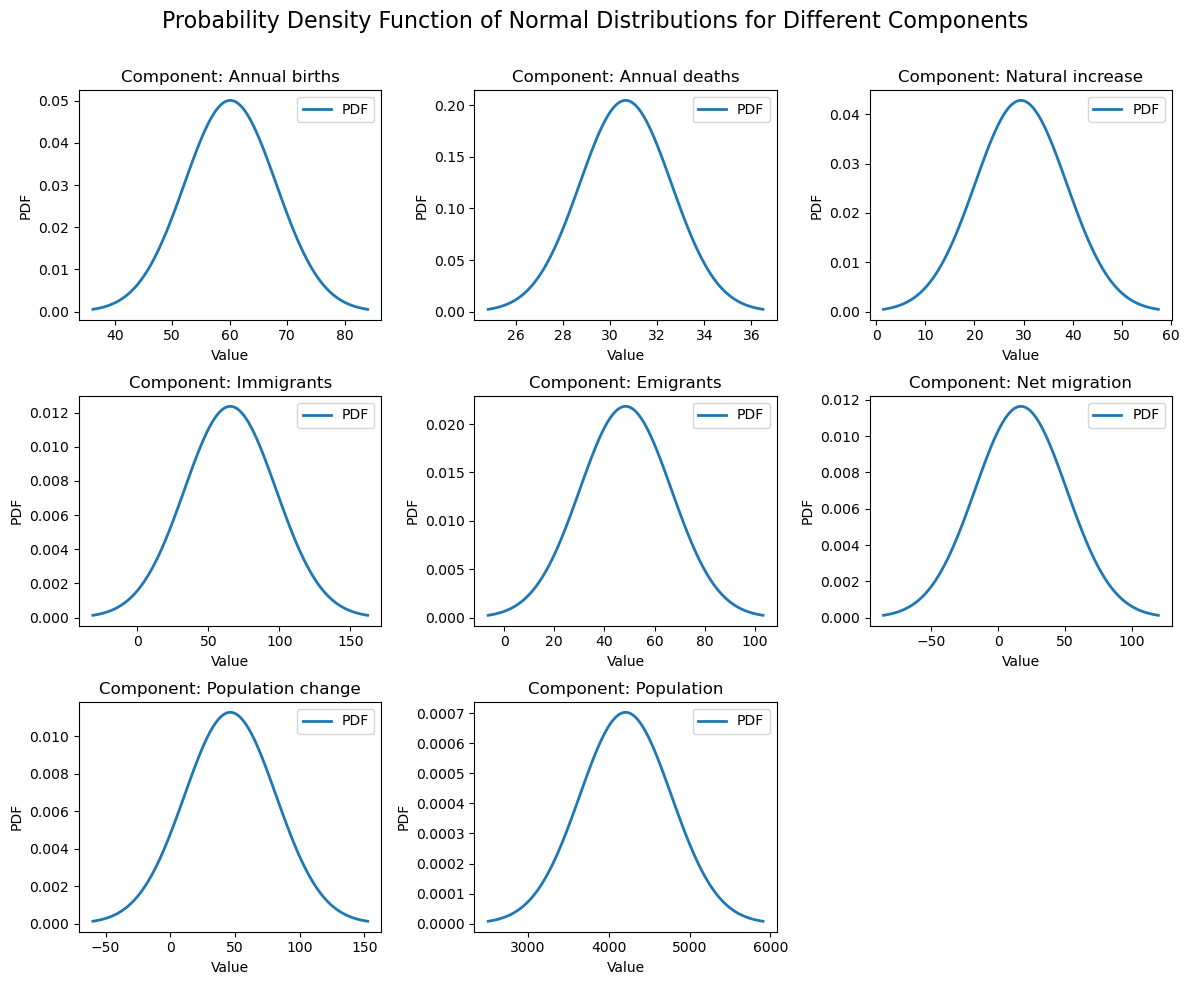

In [11]:
# Get unique components in the data
unique_components = data['Component'].unique()

# Create subplots in a 3x3 grid
num_rows, num_cols = 3, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
fig.suptitle('Probability Density Function of Normal Distributions for Different Components', fontsize=16)

for i, component in enumerate(unique_components):
    row = i // num_cols
    col = i % num_cols

    # Extract data for the current component
    component_data = data[data['Component'] == component]['VALUE']

    # Calculate the mean and standard deviation for the component's data
    mean_value = np.mean(component_data)
    std_value = np.std(component_data)

    # Create the frozen normal distribution
    pdf = sp.norm(loc=mean_value, scale=std_value)

    # Generate values for the x-axis
    x = np.linspace(mean_value - 3 * std_value, mean_value + 3 * std_value, 100)

    # Calculate the PDF for the component's data
    pdf_values = pdf.pdf(x)

    # Plot the PDF in the current subplot
    ax = axes[row, col]
    ax.plot(x, pdf_values, lw=2, label='PDF')
    ax.set_title(f'Component: {component}')
    ax.set_xlabel('Value')
    ax.set_ylabel('PDF')
    ax.legend()

# Remove any remaining empty subplots
for i in range(len(unique_components), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


#### Data Preparation and Visualization

 Now we will explore our data visually to gain useful insights out of it. We will look for different component values across the years and relationship between values of different components

We first start with reloading our data again and using info method to seek tabular info

In [12]:
data.head(10)

,STATISTIC Label,Year,Component,UNIT,VALUE
288,Annual Population Change,1987,Annual births,Thousand,61.2
289,Annual Population Change,1987,Annual deaths,Thousand,32.2
290,Annual Population Change,1987,Natural increase,Thousand,29.0
291,Annual Population Change,1987,Immigrants,Thousand,17.2
292,Annual Population Change,1987,Emigrants,Thousand,40.2
293,Annual Population Change,1987,Net migration,Thousand,-23.0
294,Annual Population Change,1987,Population change,Thousand,5.9
295,Annual Population Change,1987,Population,Thousand,3546.5
296,Annual Population Change,1988,Annual births,Thousand,57.8
297,Annual Population Change,1988,Annual deaths,Thousand,31.6


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 288 to 583
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  296 non-null    object 
 1   Year             296 non-null    int64  
 2   Component        296 non-null    object 
 3   UNIT             296 non-null    object 
 4   VALUE            296 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 13.9+ KB


Here our working fields are Year, Component and VALUE so we drop the Label and UNIT column

In [14]:
data = data[['Year','Component','VALUE']]
data.head(10)

,Year,Component,VALUE
288,1987,Annual births,61.2
289,1987,Annual deaths,32.2
290,1987,Natural increase,29.0
291,1987,Immigrants,17.2
292,1987,Emigrants,40.2
293,1987,Net migration,-23.0
294,1987,Population change,5.9
295,1987,Population,3546.5
296,1988,Annual births,57.8
297,1988,Annual deaths,31.6


It is best for us to convert different components into fields which we will do using pivot method from pandas and reset indexes

In [15]:
new_data = data.pivot(index='Year', columns='Component', values='VALUE').reset_index()
# Removing the index column
new_data.columns.name = None          
new_data

,Year,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population,Population change
0,1987,61.2,32.2,40.2,17.2,29.0,-23.0,3546.5,5.9
1,1988,57.8,31.6,61.1,19.2,26.2,-41.9,3530.7,-15.8
2,1989,53.6,31.0,70.6,26.7,22.6,-43.9,3509.5,-21.2
3,1990,51.9,32.8,56.3,33.3,19.1,-22.9,3505.8,-3.7
4,1991,53.1,31.1,35.3,33.3,22.0,-2.0,3525.7,19.9
5,1992,52.8,31.4,33.4,40.7,21.4,7.4,3554.5,28.8
6,1993,50.4,30.4,35.1,34.7,20.0,-0.4,3574.1,19.6
7,1994,49.1,32.6,34.8,30.1,16.6,-4.7,3585.9,11.8
8,1995,48.4,31.2,33.1,31.2,17.2,-1.9,3601.3,15.4
9,1996,48.8,32.0,31.2,39.2,16.7,8.0,3626.1,24.8


Lets' check some statistics for this updated dataset using the describe method

In [16]:
new_data.describe()

,Year,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population,Population change
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,2005.000000,60.105405,30.651351,48.459459,65.405405,29.443243,16.937838,4206.608108,46.383784
std,10.824355,8.080462,1.975070,18.520371,32.716840,9.450031,34.750950,575.151783,35.901095
min,1987.000000,48.400000,27.000000,25.300000,17.200000,16.600000,-43.900000,3505.800000,-21.200000
25%,1996.000000,53.600000,28.900000,31.500000,40.700000,21.500000,-4.700000,3626.100000,20.100000
50%,2005.000000,59.700000,31.000000,49.200000,59.000000,28.800000,17.300000,4133.800000,42.300000
75%,2014.000000,65.400000,32.000000,64.000000,84.600000,35.600000,41.300000,4645.400000,71.300000
max,2023.000000,77.200000,35.500000,83.000000,151.100000,48.800000,104.800000,5281.600000,142.900000


Now our data is ready for analysis, we will look for trends of different components across years. We will use seaborn to make more visually apealing graphs

In [17]:
new_data.columns[1:]

Index(['Annual births', 'Annual deaths', 'Emigrants', 'Immigrants',
       'Natural increase', 'Net migration', 'Population', 'Population change'],
      dtype='object')

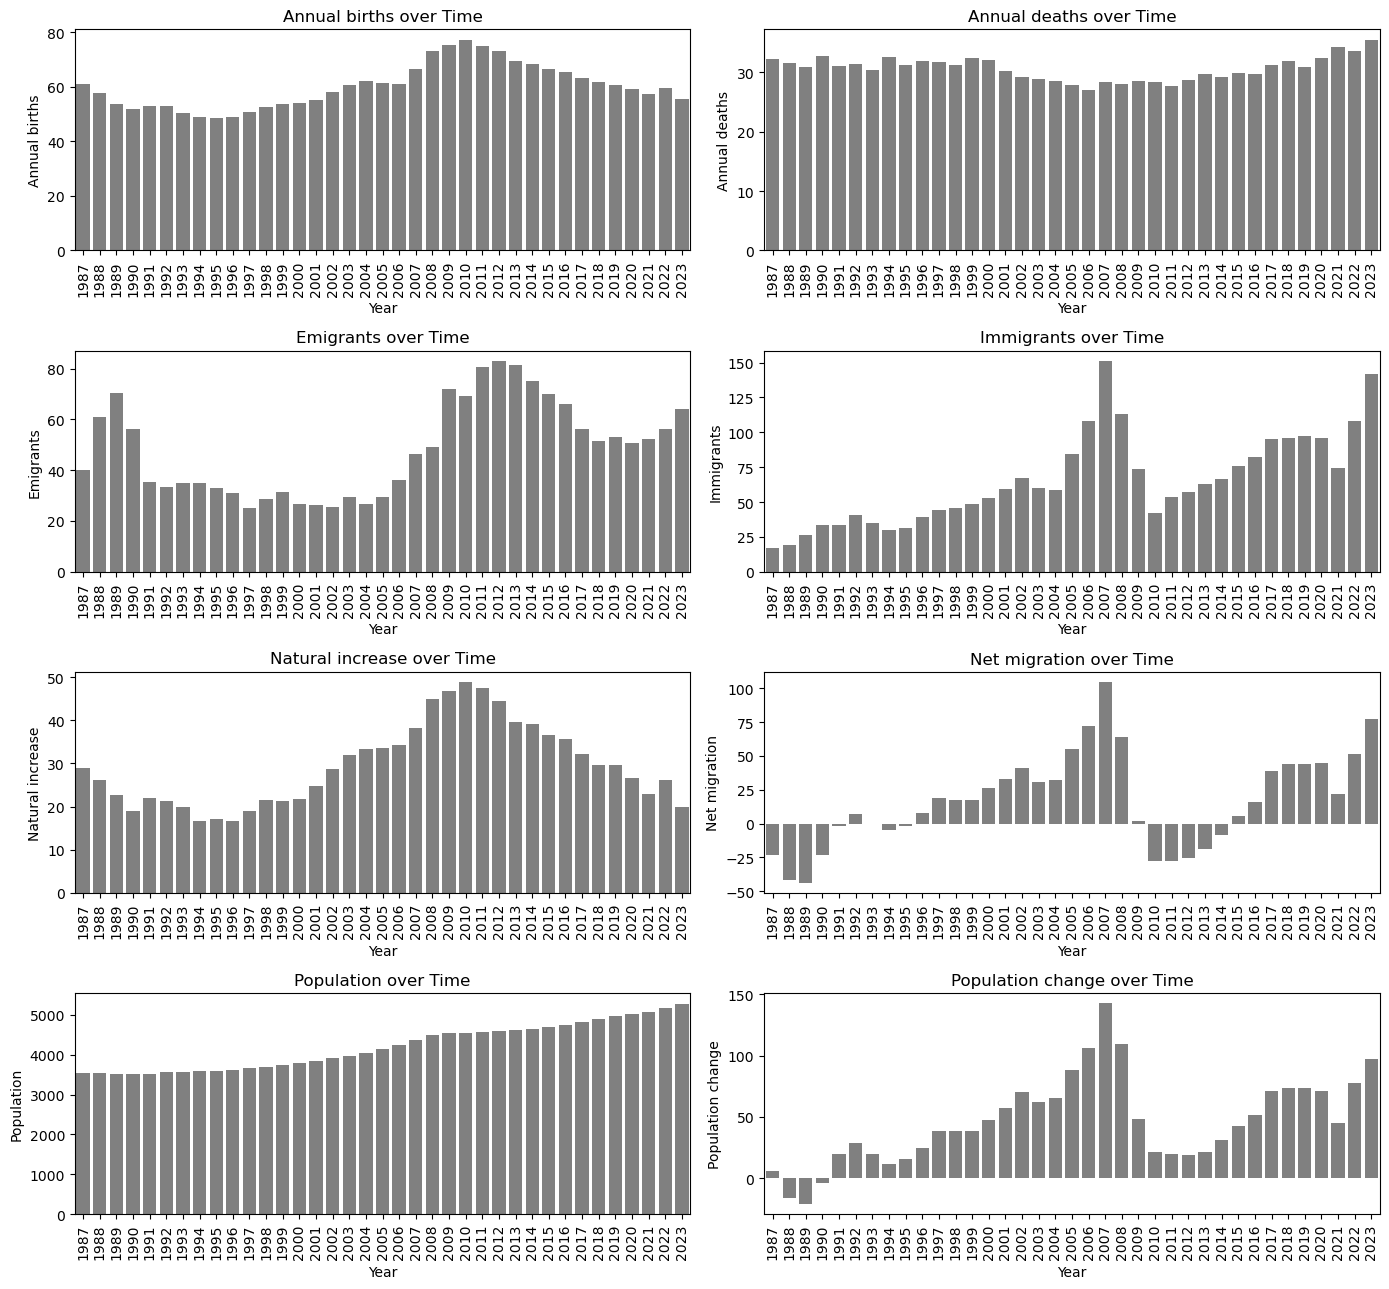

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(14, 13))

# Define the list of columns to plot
columns_to_plot = new_data.columns[1:]

for i, ax in enumerate(axes.ravel()):
    if i < len(columns_to_plot):
        # Plot each column as a bar graph
        sns.barplot(data=new_data, x='Year', y=columns_to_plot[i], ax=ax, color='grey')
        ax.set_title(f'{columns_to_plot[i]} over Time')
        ax.set_xlabel('Year')
        ax.set_ylabel(columns_to_plot[i])
        ax.tick_params(axis='x',rotation=90)

# Ensure tight layout and display the plot
plt.tight_layout()
plt.show()

 We are also interested in looking for relationships between different components fields, this can be done using correlation matrix

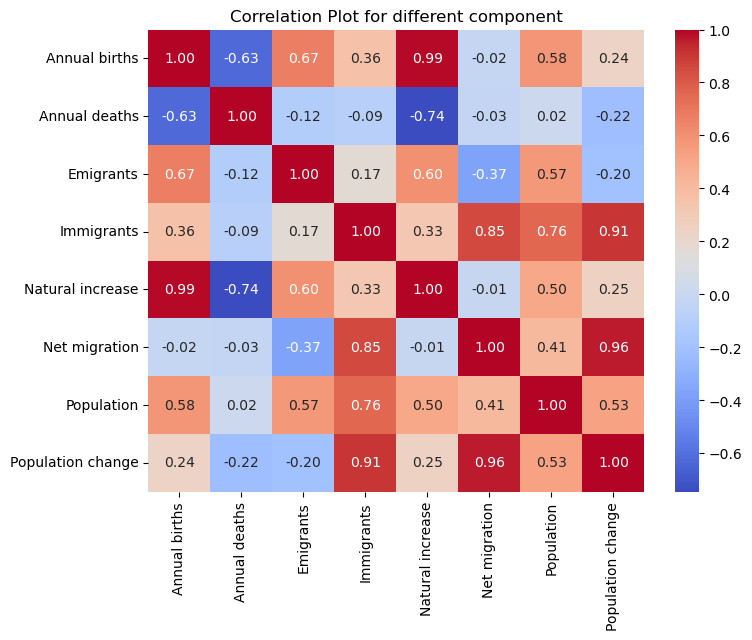

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(new_data[new_data.columns[1:]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Plot for different component')
plt.show()

#### Machine Learning for Data Analytics

Before passing the data to modeling phase, it is a good practise to transform the data into standardized form to avoid complications with computation. Therefore, we will use MinMaxScalar from sklearn package.

In [21]:
target = new_data['Population change']
features = new_data.loc[:, ~new_data.columns.isin(['Population change', 'Year', 'Population', 'Natural increase','Net migration'])]

scalar = MinMaxScaler()
scaled_features = scalar.fit_transform(features)

 We are interested in creating a linear regression model with target variable population change for features Annual births, Annual deaths, Emigrants and Immigrants

In [22]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=12)

In [23]:
model = LinearRegression()
model.fit(X_train,y_train)
y_hat = model.predict(X_test)

mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)

Mean Squared Error: 0.0027503098072328854
R-squared (R2): 0.9999976435054367


 This result shows that our model has performed well with given features

 Lets create another regression model. This time we will select Ridge Regression and compare the model parameters with linear regression

In [24]:
model = Ridge(alpha=0.01)
model.fit(X_train,y_train)
y_hat = model.predict(X_test)

mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)

Mean Squared Error: 0.06964037785173773
R-squared (R2): 0.9999403313869017


We used the hyperparamter alpha which is our regularization co-efficient to be 0.01. It will be more interested to use different values of alpha and check how model performs for each value of hyperparameter

In [25]:
alpha_list = np.linspace(0.01,0.9)              # Setting alpha from 0.01 to 0.9

ridge_model_parameters = {
    'MSE': None,
    'R_square': None
}

MSE = []
R_square = []

for alpha in alpha_list:
    model = Ridge(alpha=alpha)
    model.fit(X_train,y_train)
    y_hat = model.predict(X_test)

    mse = mean_squared_error(y_test, y_hat)
    r2 = r2_score(y_test, y_hat)
    
    MSE.append(mse)
    R_square.append(r2)

ridge_model_parameters['MSE'] = MSE
ridge_model_parameters['R_square'] = R_square

ridge_model_parameters_dataframe = pd.DataFrame(ridge_model_parameters)

Now lets plot Mean Squared Error and R-Squared for each alpha for better view

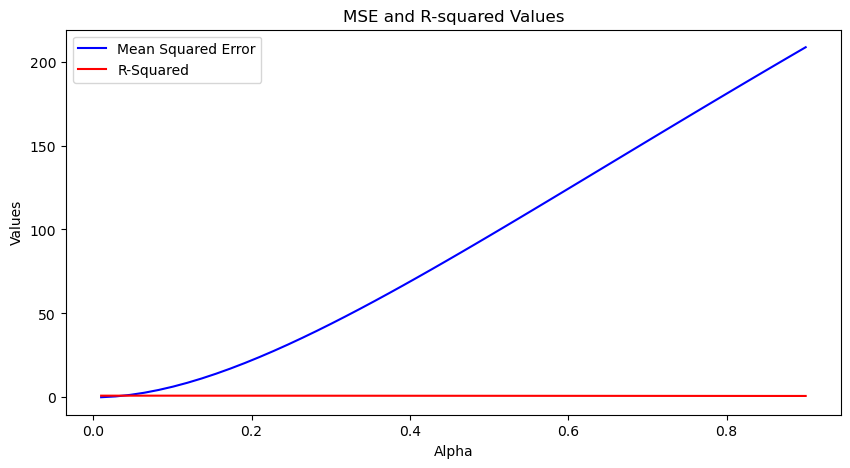

In [26]:
plt.figure(figsize=(10,5))
plt.plot(alpha_list,ridge_model_parameters['MSE'], linestyle='-',color='blue', label='Mean Squared Error')
plt.plot(alpha_list,ridge_model_parameters['R_square'], linestyle='-', color='r', label='R-Squared')

plt.xlabel('Alpha')
plt.ylabel('Values')
plt.title('MSE and R-squared Values')
plt.legend()

 This increase in mean squared error with constant r-square shows that our model becomes overfit as we increase the alpha parameter i.e. with more regularization